In [90]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats


In [91]:
data=pd.read_csv('indian1_liver_patient.csv')

In [92]:
data.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [93]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [94]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio    False
Dataset                       False
dtype: bool

In [95]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [96]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['Gender']=lc.fit_transform(data['Gender'])

In [97]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947736,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319199,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


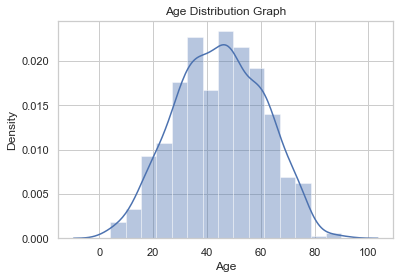

In [98]:
sns.distplot(data['Age'])
plt.title('Age Distribution Graph')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dataset', ylabel='count'>

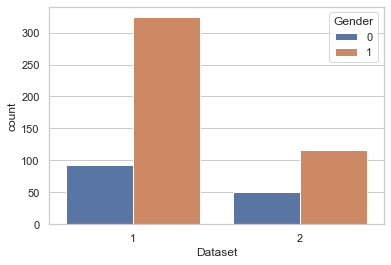

In [99]:
sns.countplot(data['Dataset'],hue=data['Gender'])

<AxesSubplot:>

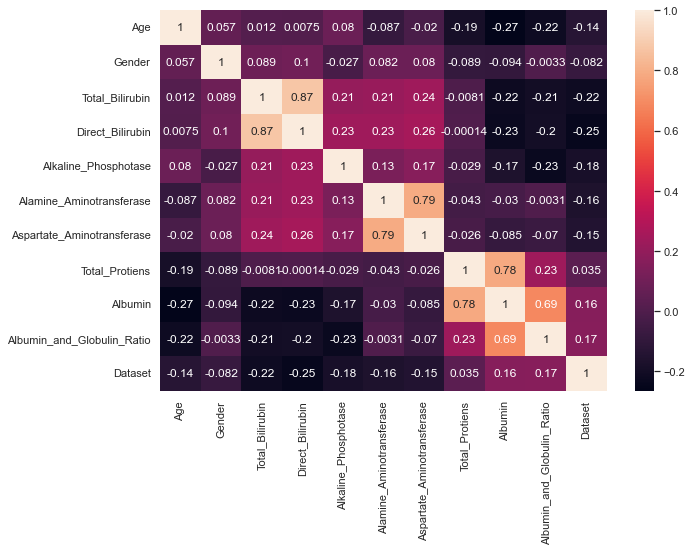

In [100]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [101]:
from sklearn.preprocessing import scale 
X=data.iloc[:,:-1]
X_scaled=pd.DataFrame (scale(X),columns=X.columns)

In [102]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()
columns_to_scale = ['Age','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin_and_Globulin_Ratio']
data[columns_to_scale] = MinMaxScaler.fit_transform(data[columns_to_scale])

In [103]:
x=data.iloc[:,:-1]
y=data.Dataset

In [104]:
data[columns_to_scale]

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin_and_Globulin_Ratio
0,0.709302,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.240
1,0.674419,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.176
2,0.674419,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.236
3,0.627907,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.280
4,0.790698,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.040
...,...,...,...,...,...,...,...,...
578,0.651163,0.001340,0.000000,0.213483,0.005025,0.004879,0.463768,0.028
579,0.418605,0.002681,0.000000,0.017098,0.012563,0.004269,0.478261,0.320
580,0.558140,0.005362,0.005102,0.088911,0.019095,0.007928,0.536232,0.280
581,0.313953,0.012064,0.020408,0.059111,0.009548,0.004472,0.594203,0.280


In [105]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)

In [106]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20,stratify= y)

In [107]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20,stratify= y)

In [108]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [109]:

resample = SMOTE()

In [110]:
y_train.value_counts()
X_train.value_counts()

Age       Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  Albumin  Albumin_and_Globulin_Ratio
0.406977  1       0.020107         0.040816          0.057157              0.016080                  0.010571                    0.681159        4.3      0.432                         2
0.418605  0       0.006702         0.010204          0.112360              0.111558                  0.047774                    0.594203        3.1      0.200                         2
0.162791  1       0.005362         0.005102          0.106986              0.031156                  0.026428                    0.405797        2.5      0.200                         2
0.302326  1       0.016086         0.015306          0.131412              0.037186                  0.026225                    0.420290        2.7      0.240                         2
0.348837  1       0.049598         0.096939          0.110405              

In [123]:
x_train.shape
#y_train.shape

(624, 10)

In [119]:
y_train.shape

(624,)

In [124]:
x_train, y_train = resample.fit_resample(x_train, y_train)

In [129]:
x_train.value_counts()

Age       Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  Albumin  Albumin_and_Globulin_Ratio
0.348837  1       0.049598         0.096939          0.110405              0.434673                  0.146575                    0.333333        2.7      0.320                         2
0.406977  1       0.020107         0.040816          0.057157              0.016080                  0.010571                    0.681159        4.3      0.432                         2
0.302326  1       0.016086         0.015306          0.131412              0.037186                  0.026225                    0.420290        2.7      0.240                         2
0.418605  0       0.006702         0.010204          0.112360              0.111558                  0.047774                    0.594203        3.1      0.200                         2
0.162791  1       0.005362         0.005102          0.106986              

In [228]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [229]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [230]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(x_train,y_train)
y_predict=model1.predict(x_test)
rfc1=accuracy_score(y_test,y_predict)
rfc1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           1       0.81      0.77      0.79       104
           2       0.49      0.55      0.52        42

    accuracy                           0.71       146
   macro avg       0.65      0.66      0.65       146
weighted avg       0.72      0.71      0.71       146



In [231]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [232]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  # Correct import
from sklearn.metrics import accuracy_score, classification_report


In [233]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(x_train,y_train)
y_predict=model4.predict(x_test)
dtc1=accuracy_score(y_test,y_predict)
dtc1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           1       0.78      0.80      0.79       104
           2       0.47      0.45      0.46        42

    accuracy                           0.70       146
   macro avg       0.63      0.63      0.63       146
weighted avg       0.69      0.70      0.70       146



In [234]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(x_train,y_train)
y_predict=model2.predict(x_test)
knn1=accuracy_score(y_test,y_predict)
knn1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           1       0.79      0.60      0.68       104
           2       0.38      0.62      0.47        42

    accuracy                           0.60       146
   macro avg       0.59      0.61      0.58       146
weighted avg       0.68      0.60      0.62       146



In [235]:
from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
model5.fit(x_train,y_train)
y_predict=model2.predict(x_test)
logi1=accuracy_score(y_test,y_predict)
logi1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.79      0.60      0.68       104
           2       0.38      0.62      0.47        42

    accuracy                           0.60       146
   macro avg       0.59      0.61      0.58       146
weighted avg       0.68      0.60      0.62       146



In [236]:
import tensorflow.keras

In [237]:
from tensorflow.keras.models import Sequential

In [238]:
from tensorflow.keras.layers import Dense

In [239]:
classifier=Sequential()


In [240]:
classifier.add(Dense(units=100,activation='relu',input_dim=10))

In [241]:
classifier.add(Dense(units=50,activation='relu'))

In [242]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [243]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [244]:
model_history=classifier.fit(x_train,y_train,batch_size=100,validation_split=0.2,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 42ms/step - loss: 0.5102 - accuracy: 0.4549 - val_loss: -0.3097 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: -0.0655 - accuracy: 0.6253 - val_loss: -1.1801 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: -0.4468 - accuracy: 0.6253 - val_loss: -1.8471 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 12ms/step - loss: -0.7459 - accuracy: 0.6253 - val_loss: -2.4829 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: -1.0209 - accuracy: 0.6253 - val_loss: -3.1526 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 10ms/step - loss: -1.3015 - accuracy: 0.6253 - val_loss: -3.9228 - val_accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 11ms/step - loss: -1.6261 - accuracy: 0.6253 - val_loss: -4.7972 - val_

In [245]:
model4.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

C:\Users\haari\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [246]:
model1.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

C:\Users\haari\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [247]:
model2.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

C:\Users\haari\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [248]:
model5.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

C:\Users\haari\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [253]:
classifier.save("liver.h5")

C:\Users\haari\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [251]:
y_pred=classifier.predict(x_test)

5/5 [==============================] - 0s 3ms/step


In [255]:
y_pred
y_pred=(y_pred>0.5)
y_pred


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [256]:
def predict_exit(sample_value):
    sample_value=np.array(sample_value)
    sample_value=sample_value.reshape(1,-1)
    sample_value=scale(sample_value)
    return classifier.predict(sample_value)

In [257]:
sample_value=[[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]]
if predict_exit(sample_value)>0.5:
    print('Pridiction: Liver Patient')
else:
    print('Prediction: Healthy')

1/1 [==============================] - 0s 56ms/step
Pridiction: Liver Patient


In [259]:
acc_resample=[['KNeighborsClassifier',knn1],['Classifier',knn1],['RandomForestClassifier',rfc1],['DecisionTreeClassifier',dtc1],['LogisticRegression',logi1]]
Liverpatient_pred=pd.DataFrame(acc_resample,columns=['classification models','accuracy_score'])
Liverpatient_pred

,classification models,accuracy_score
0,KNeighborsClassifier,0.602740
1,Classifier,0.602740
2,RandomForestClassifier,0.705479
3,DecisionTreeClassifier,0.698630
4,LogisticRegression,0.602740


<AxesSubplot:title={'center':'classification models & accuracy scores after resample'}, xlabel='classification models', ylabel='accuracy_score'>

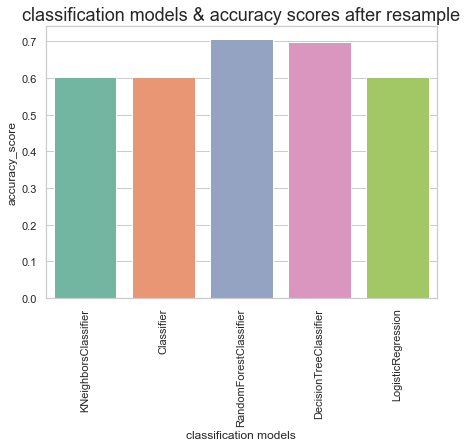

In [263]:
plt.figure(figsize==(7,5))
plt.xticks(rotation=90)
plt.title('classification models & accuracy scores after resample',fontsize=18)
sns.barplot(x="classification models",y="accuracy_score", data=Liverpatient_pred,palette="Set2")

from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier
model.fit(x,y)

In [266]:
from sklearn.ensemble import ExtraTreesClassifier

In [269]:
model = ExtraTreesClassifier(n_estimators=100, random_state=42)

In [270]:
model.fit(x, y)

ExtraTreesClassifier(random_state=42)

In [272]:
model.feature_importances_

array([0.12146973, 0.02797791, 0.11386455, 0.0989231 , 0.11804822,
       0.1129615 , 0.11739091, 0.09220421, 0.09781776, 0.09934212])

In [274]:
dd=pd.DataFrame(model.feature_importances_,index=x.columns).sort_values(0,ascending=False)

In [275]:
dd

,0
Age,0.121470
Alkaline_Phosphotase,0.118048
Aspartate_Aminotransferase,0.117391
Total_Bilirubin,0.113865
Alamine_Aminotransferase,0.112962
Albumin_and_Globulin_Ratio,0.099342
Direct_Bilirubin,0.098923
Albumin,0.097818
Total_Protiens,0.092204
Gender,0.027978


Text(0.5, 1.0, 'FEATURE IMPORTANCE')

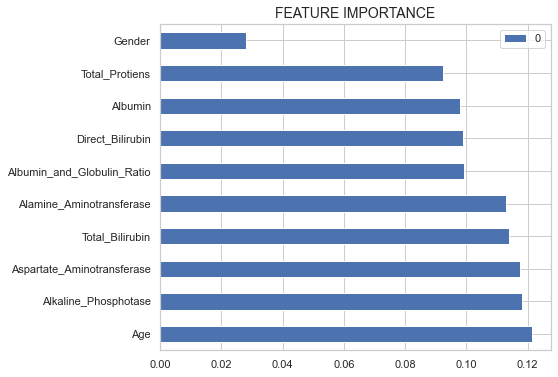

In [276]:
dd.plot(kind='barh',figsize=(7,6))
plt.title("FEATURE IMPORTANCE",fontsize=14)

Direct_Billrubin & Total_Billrubin are the most important features to predict the outcomes

In [277]:
import joblib
joblib.dump(model1, 'ETC.pk1')

['ETC.pk1']